# Plot cropland number density maps

This notebook plots Appendix Figure A1, i.e. a cropland number density map at 1km resolution for all 6 considered crops. Note that this notebook uses netcdf files instead of Climada exposures (available upon request from raphael.portmann@alumni.ethz.ch)

In [1]:
import sys, os
from pathlib import Path
#add path to path of current skript, where also utility.py lies
sys.path.append(Path.cwd().absolute())
#own utility functions
from utility import en_names, plot_CH_map, data_dir
#others
import numpy as np
import cartopy.crs as ccrs
import pandas as pd
import geopandas as gpd
import xarray as xr
import colorcet as cet
import matplotlib.pyplot as plt
import matplotlib
import colorcet as cc

Select croptypes and directories, then load netcdf data with damage and exposure information

In [2]:
croptypes=['Weizen','Mais','Raps','Gerste','Weizen_Mais_Raps_Gerste','Reben']

# set directories
datapath = f'{data_dir}/damage_exposure_netcdf/'
figdir = 'C:/Users/F80840370/projects/scClim/climada/scClim/subproj_D/papers/NHESS/fig/'

#read damage/exposure data
damages_exposure_data={}
for croptype in croptypes:
    filename=f'{datapath}/damage_claims_SHV_{croptype}_gridded_1km.nc'
    damages_exposure_data[croptype]=xr.open_dataset(filename)



Now plot the figure

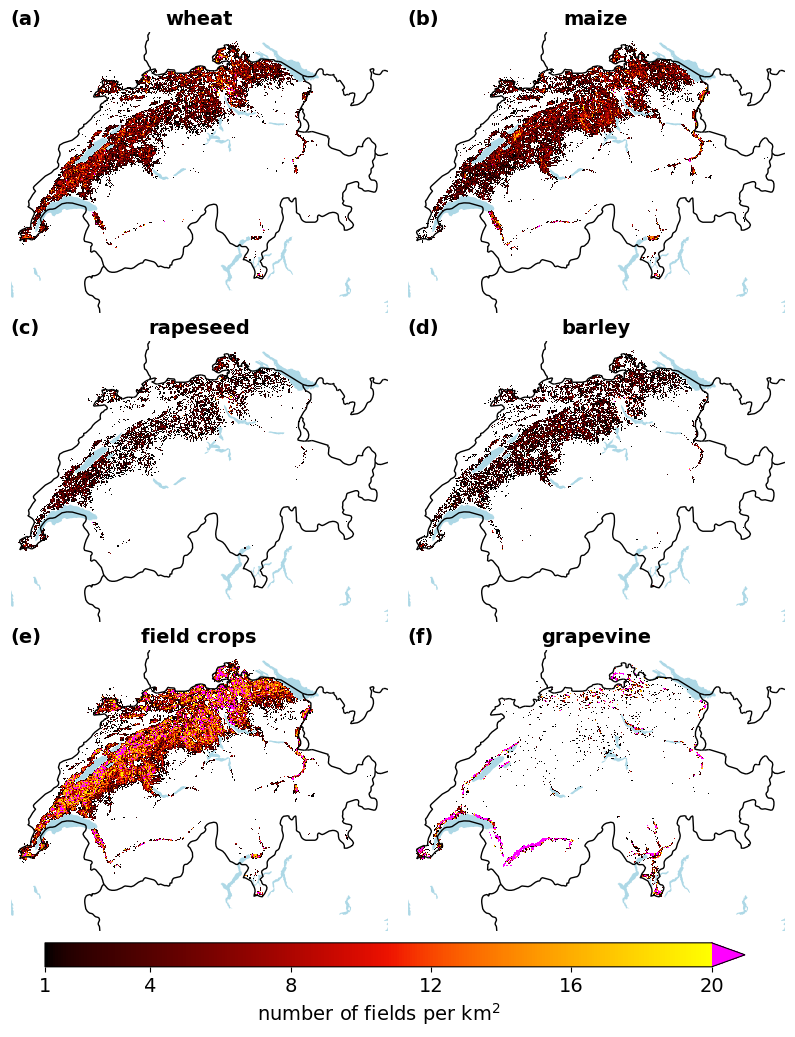

In [3]:
#set fontsize of figure
matplotlib.rcParams.update({'font.size': 14})

#set panel labels
labels=['(a)','(b)','(c)','(d)','(e)','(f)']

#get colorcet colormap and set upper extension color
cmap=cc.cm.CET_L4
cmap.set_over('magenta')

#setup figure with 3 rows and 2 columns
fig,axs,exts=plot_CH_map(nrows=3,ncols=2, figsize=(10,12), 
                            stamen_map=False, 
                            proj=ccrs.PlateCarree(),
                            pads=[0.1,0.1,0.3,0.1],
                            edgecolor='white')

#make subplots tight
plt.subplots_adjust(wspace=0.05, hspace=0.01)

for i,ax in enumerate(axs):
    ax.text(0,1.02,labels[i], transform=ax.transAxes,fontweight='bold')
    #set title of subplot
    ax.text(0.5,1.02,en_names[croptypes[i]], ha='center', transform=ax.transAxes,fontweight='bold')

# loop over croptypes and plot cropland number density
for i,croptype in enumerate(croptypes):


    dat=damages_exposure_data[croptype]['n_fields_exp']
    dat=xr.where(dat>0,dat,np.nan)

    hs=xr.plot.pcolormesh(darray=dat,x='chx',y='chy',
                        ax=axs[i],add_colorbar=False,add_labels=False,
                        transform=ccrs.epsg(2056),
                        extend='max',
                        vmin=1,
                        vmax=20,
                        cmap=cmap)
    
cbar_ax = fig.add_axes([0.16, 0.09, 0.7, 0.02])
fig.colorbar(hs,cax=cbar_ax,ticks=[1,4,8,12,16,20],extend='max',label=r'number of fields per km$^2$', orientation = 'horizontal')
#add_cb_in_plot(axs[2],hs,ticks=[1,8,15,22,30],label='# fields',extend='max')


Now save Figure

In [4]:
fig.savefig(f'{figdir}/Figure_A1.png',dpi=100,bbox_inches='tight')
fig.savefig(f'{figdir}/Figure_A1.pdf',dpi=100,bbox_inches='tight')
